# **Importing Necessary Libraries**

## **Overview**
This section imports essential Python libraries required for **data processing, visualization, machine learning, and model evaluation**.

## **Library Breakdown**
1. **OS Module (`os`)**  
   - Used for file and directory operations, such as listing files in a directory.
   
2. **Data Handling (`pandas`, `numpy`, `csv`)**  
   - `pandas`: Used for creating and manipulating DataFrames.  
   - `numpy`: Provides support for numerical operations.  
   - `csv`: Helps with reading and writing CSV files.  

3. **Regular Expressions (`re`)**  
   - Used for text cleaning and pattern matching in JavaScript scripts.

4. **Visualization (`matplotlib.pyplot`, `seaborn`)**  
   - `matplotlib.pyplot`: Helps in plotting various graphs.  
   - `seaborn`: Enhances visualization with statistical graphs.  

5. **Machine Learning & Feature Extraction (`sklearn`)**  
   - `train_test_split`: Splits data into training and testing sets.  
   - `TfidfVectorizer`: Converts text data into numerical format using TF-IDF.  
   - `RandomForestClassifier`: A tree-based ensemble learning method.  
   - `GradientBoostingClassifier`: Another tree-based classifier using boosting.  
   - `SVC`: Support Vector Machine classifier with a linear kernel.  
   - `accuracy_score`: Evaluates model performance using accuracy.  
   - `confusion_matrix`: Analyzes true vs. predicted classifications.  
   - `classification_report`: Generates precision, recall, and F1-score.

6. **Model Persistence (`joblib`)**  
   - Used to **save** and **load** trained models and vectorizers for later use.

## **Purpose**
These libraries form the foundation of the **JavaScript obfuscation classification pipeline**, supporting **data preprocessing, model training, evaluation, and visualization**.


In [5]:
import os
import pandas as pd
import numpy as np
import re
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

# **Defining File Paths**

## **Overview**
This section defines the **file paths** used to load and save the JavaScript dataset.

## **Path Breakdown**
1. **`data_path`**  
   - Specifies the location where the **processed dataset** will be saved in CSV format.

2. **`non_obf_path`**  
   - Points to the directory containing **non-obfuscated JavaScript files**.  
   - These scripts are in their original, readable form.

3. **`obf_path`**  
   - Points to the directory containing **obfuscated JavaScript files**.  
   - These scripts have been transformed to make them difficult to read or analyze.

## **Purpose**
These paths ensure that:
- **Raw data** is loaded from the correct directories.
- **Processed data** is saved in a structured format for further analysis.


In [6]:
# Paths
data_path = "/kaggle/working/jav_script_datset.csv"
non_obf_path = "/kaggle/input/java-script-dataset/Final Project/JavascriptSamples"
obf_path = "/kaggle/input/java-script-dataset/Final Project/JavascriptSamplesObfuscated"


# **Data Loading and Preprocessing Pipeline**

## **Overview**
The `load_scripts()` function is responsible for **loading JavaScript files** from a specified directory and assigning them a classification label (e.g., **0 for non-obfuscated** and **1 for obfuscated** scripts).

## **Function Explanation**
1. **Initialize an empty list (`data`)** to store the script content along with its label.
2. **Iterate through files** in the given directory using `os.listdir()`.
3. **Construct the full file path** using `os.path.join()`.
4. **Attempt to read the file**:
   - Open each file with `"utf-8"` encoding while **ignoring errors** to handle various character encodings.
   - Read the file content and store it as a **tuple (`content, label`)** in the `data` list.
5. **Handle errors gracefully**:
   - If an issue occurs while reading a file, an **exception is caught and printed**, ensuring the process continues.

## **Purpose**
This function efficiently loads script data while handling **file reading errors**, making it essential for preprocessing JavaScript files before analysis.


In [7]:

# Data Loading and Preprocessing Pipeline
def load_scripts(directory, label):
    data = []
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        try:
            with open(file_path, "r", encoding="utf-8", errors="ignore") as file:
                content = file.read()
                data.append((content, label))
        except Exception as e:
            print(f"Error reading {file_path}: {e}")
    return data


This code loads JavaScript scripts from the specified directories, labeling non-obfuscated scripts as `0` and obfuscated scripts as `1`.


In [8]:
# Load datasets
print("Loading scripts...")
non_obfuscated_data = load_scripts(non_obf_path, 0)
obfuscated_data = load_scripts(obf_path, 1)

Loading scripts...


# **Creating a DataFrame and Exploratory Data Analysis (EDA)**

## **Creating the Dataset**
The script data, which consists of both **non-obfuscated** and **obfuscated** JavaScript files, is combined into a **pandas DataFrame**. The DataFrame consists of two columns:
- **`script`**: Contains the actual JavaScript code as text.
- **`label`**: A numerical label indicating whether the script is **non-obfuscated (`0`)** or **obfuscated (`1`)**.

## **Exploratory Data Analysis (EDA)**
To understand the dataset distribution, an initial **summary** is printed using `value_counts()`, which provides a count of each class (0 and 1). 

A **count plot** is then generated using `seaborn` to visualize the distribution of obfuscated vs. non-obfuscated scripts. This helps in identifying class imbalances, if any, and provides insights into the dataset composition.

The plot includes:
- **X-axis:** Class labels (0 for non-obfuscated, 1 for obfuscated).
- **Y-axis:** Number of occurrences in the dataset.
- **Title & Labels:** Clearly indicating the distinction between the two classes.

This visualization is crucial in understanding the dataset before applying machine learning models.


Dataset Summary:
label
0    1898
1    1477
Name: count, dtype: int64


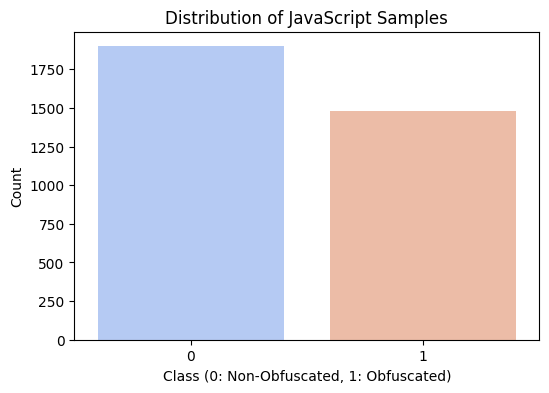

In [9]:

# Create DataFrame
dataset = pd.DataFrame(non_obfuscated_data + obfuscated_data, columns=["script", "label"])

# Exploratory Data Analysis (EDA)
print("Dataset Summary:")
print(dataset["label"].value_counts())
plt.figure(figsize=(6, 4))
sns.countplot(x=dataset["label"], palette="coolwarm")
plt.title("Distribution of JavaScript Samples")
plt.xlabel("Class (0: Non-Obfuscated, 1: Obfuscated)")
plt.ylabel("Count")
plt.show()

# **Word Count Computation and Distribution Analysis**

## **Computing Word Count per Script**
Each JavaScript script's word count is calculated by applying a **lambda function** to the `script` column. The function **splits** the script text into individual words and counts the total number of words in each script. This word count is stored in a new column called **`word_count`**.

## **Visualizing Word Count Distribution**
A **histogram** is plotted using `seaborn` to analyze the distribution of word counts across the dataset. The histogram:
- Uses **50 bins** to group scripts by word count ranges.
- Includes a **kernel density estimate (KDE)** curve for a smooth representation of the data distribution.
- Uses the color **"teal"** for better visualization.

## **Purpose of the Analysis**
This analysis helps in understanding the variability in script length between **obfuscated and non-obfuscated** JavaScript files. Obfuscated scripts often have significantly different word counts compared to non-obfuscated ones, making this a useful feature for classification.


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


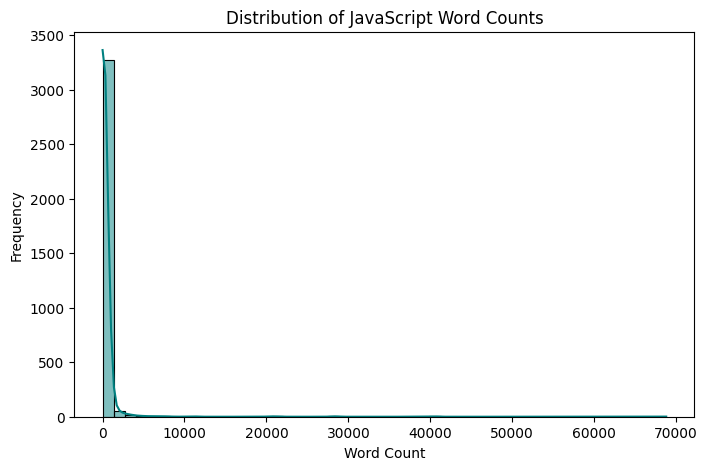

In [18]:
# Compute word count per script
dataset["word_count"] = dataset["script"].apply(lambda x: len(x.split()))

# Plot distribution
plt.figure(figsize=(8, 5))
sns.histplot(dataset["word_count"], bins=50, kde=True, color="teal")
plt.title("Distribution of JavaScript Word Counts")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()


# **Word Frequency Analysis and Visualization**

## **Extracting Top Words**
A function named `get_top_words` is used to identify the **20 most common words** in both **non-obfuscated** and **obfuscated** JavaScript scripts. The function works as follows:
1. It **joins** all the script texts together into a single string.
2. The text is then **split into individual words**.
3. Using the `Counter` class from the `collections` module, the **most frequent words** are identified.
4. The top 20 words are printed separately for **non-obfuscated** and **obfuscated** scripts.

## **Word Cloud Generation**
To visually represent the most frequently used words, a **WordCloud** is generated for both script categories:
- The `WordCloud` object is created with a width of **800px** and height of **400px**.
- The background is set to **white** for better contrast.
- The word cloud is generated by **processing the text data**.
- The resulting image is displayed using `matplotlib`.

## **Purpose of Word Analysis**
- This analysis helps in identifying **distinctive patterns** in word usage between non-obfuscated and obfuscated scripts.
- Non-obfuscated scripts tend to contain **common programming keywords** like `function`, `var`, and `return`, whereas obfuscated scripts may contain **less readable or compressed code structures**.
- The word cloud provides a **quick visual insight** into word frequency differences, which can be useful for detecting obfuscation patterns.



Top 20 words in non-obfuscated scripts:
[('=', 56765), ('{', 49776), ('}', 31539), ('//', 25327), ('*', 19104), ('if', 18749), ('the', 17024), ('var', 13940), ('const', 13360), ('return', 11318), ('to', 9630), ('+', 9060), ('function', 8211), ('&&', 8077), ('});', 7623), ('is', 7082), ('a', 6882), ('===', 6752), ('in', 6340), ('of', 5888)]

Top 20 words in obfuscated scripts:
[('*', 4052), ('the', 1626), ('var', 1506), ('in', 714), ('//', 657), ('to', 639), ('is', 522), ('of', 516), ('new', 423), ('and', 421), ('a', 304), ('source', 297), ('this', 292), ('function', 282), ("strict';const", 238), ('{', 220), ('-', 220), ('This', 215), ('*/', 206), ("'use", 204)]


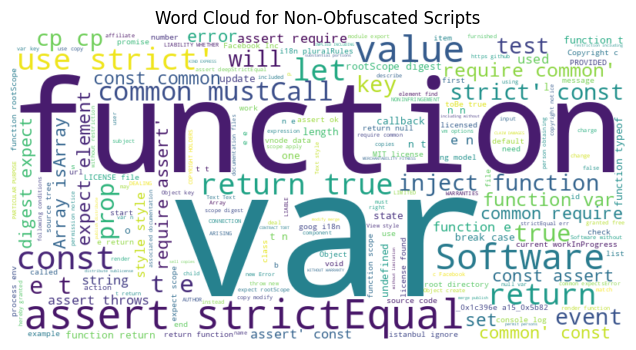

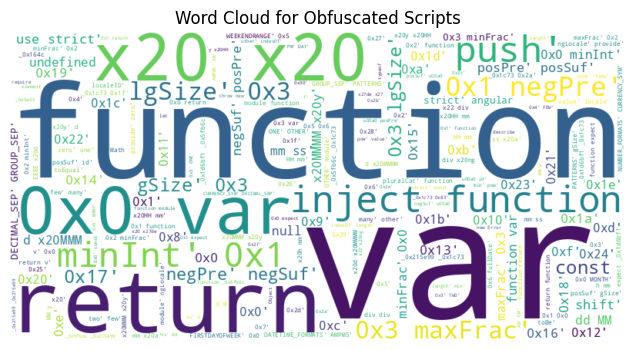

In [19]:
from collections import Counter
from wordcloud import WordCloud

# Function to get top words
def get_top_words(text_series, n=20):
    words = " ".join(text_series).split()
    return Counter(words).most_common(n)

# Top words in non-obfuscated scripts
print("\nTop 20 words in non-obfuscated scripts:")
print(get_top_words(dataset[dataset["label"] == 0]["script"]))

# Top words in obfuscated scripts
print("\nTop 20 words in obfuscated scripts:")
print(get_top_words(dataset[dataset["label"] == 1]["script"]))

# Generate word clouds
for label in [0, 1]:
    text_data = " ".join(dataset[dataset["label"] == label]["script"])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text_data)
    
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for {'Non-Obfuscated' if label == 0 else 'Obfuscated'} Scripts")
    plt.show()


# **Character Frequency Analysis in JavaScript Scripts**

## **Character Frequency Calculation**
The `char_freq` function is designed to count the **occurrence of each character** in the dataset:
1. All script texts are **concatenated** into a single string.
2. The `Counter` class from the `collections` module is used to **count occurrences** of each character.
3. A DataFrame is created to store the character frequency values.
4. The characters are **sorted in descending order** based on their occurrence.

## **Visualization of Character Frequencies**
- A **bar plot** is used to display the **15 most frequently occurring characters**.
- The `magma` color palette is used for better contrast.
- The **X-axis represents characters**, and the **Y-axis represents their frequency** in the dataset.

## **Purpose of Character Analysis**
- This analysis helps identify **common character usage patterns** in JavaScript code.
- Non-obfuscated scripts typically contain **standard programming characters** (e.g., `{`, `}`, `;`, `=`).
- Obfuscated scripts may contain **higher frequencies of special symbols** or **compressed characters**.
- Understanding character distributions can aid in detecting **script obfuscation**.


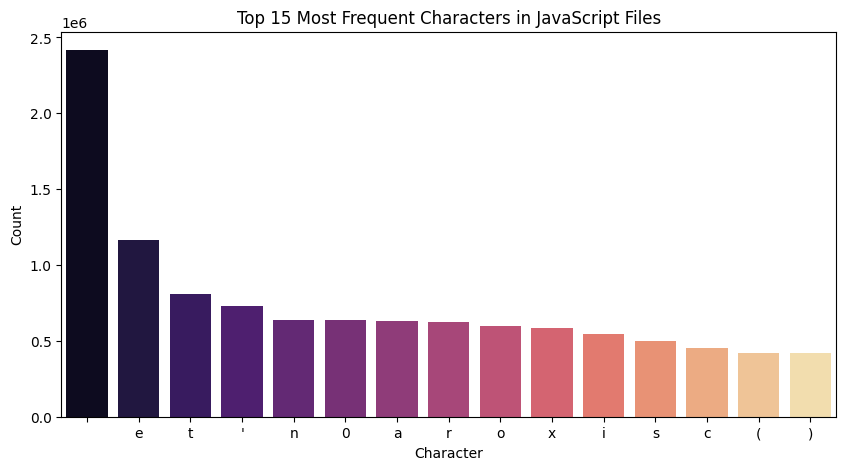

In [20]:
import string

# Function to count character frequencies
def char_freq(text_series):
    all_text = " ".join(text_series)
    return Counter(all_text)

# Plot character frequencies
char_counts = char_freq(dataset["script"])
char_df = pd.DataFrame(char_counts.items(), columns=["Character", "Count"])
char_df = char_df.sort_values(by="Count", ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=char_df["Character"][:15], y=char_df["Count"][:15], palette="magma")
plt.title("Top 15 Most Frequent Characters in JavaScript Files")
plt.xlabel("Character")
plt.ylabel("Count")
plt.show()


# **Saving the Processed Dataset**

## **Dataset Export**
The dataset is saved as a **CSV file** using the `to_csv` method from Pandas. The following parameters are used:

1. **`index=False`** – Ensures that row indices are **not** written to the file.
2. **`escapechar='\\'`** – Adds an **escape character** (`\`) before special characters to preserve data integrity.
3. **`quoting=csv.QUOTE_NONE`** – Prevents automatic quotation of values, avoiding unwanted formatting issues.

## **Purpose of Proper Escaping**
- JavaScript scripts may contain **commas, quotes, and special characters**.
- Proper escaping ensures the dataset is stored correctly without **breaking the CSV format**.
- This step is essential for **reliable future processing and analysis**.

Once saved, a confirmation message is displayed with the **file path** to ensure the dataset is stored successfully.


In [10]:

# Save dataset with proper escaping
dataset.to_csv(data_path, index=False, escapechar='\\', quoting=csv.QUOTE_NONE)
print(f"Dataset saved as {data_path}")

Dataset saved as /kaggle/working/jav_script_datset.csv


# **Feature Extraction using TF-IDF**

## **Overview**
Feature extraction converts raw text into numerical data that machine learning models can process. Here, we use **TF-IDF (Term Frequency-Inverse Document Frequency)** to transform JavaScript scripts into a **vectorized** form.

## **TF-IDF Vectorization**
- `max_features=5000`: Limits the vocabulary to the **top 5000** most important words.
- `stop_words='english'`: Removes common **English stopwords** to focus on meaningful terms.
- `fit_transform(dataset["script"])`: Learns the vocabulary and transforms scripts into a **numerical representation**.

## **Output Variables**
- **`X`**: Transformed **TF-IDF feature matrix**, representing scripts numerically.
- **`y`**: Target labels (**0: Non-Obfuscated, 1: Obfuscated**) for classification.

This step ensures that the scripts are converted into a format suitable for **machine learning models**.


In [11]:
# Feature Extraction
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(dataset["script"])
y = dataset["label"]

# **Splitting the Dataset for Training and Testing**

## **Overview**
Before training machine learning models, the dataset needs to be **split** into training and testing sets. This ensures that the model is evaluated on unseen data, preventing overfitting.

## **Key Parameters**
- **`test_size=0.2`**: Allocates **20%** of the dataset for testing and **80%** for training.
- **`random_state=42`**: Ensures **reproducibility** by setting a fixed random seed.

## **Output Variables**
- **`X_train, y_train`** → Training set (80% of the data) used for model training.
- **`X_test, y_test`** → Testing set (20% of the data) used for performance evaluation.

This step ensures a fair assessment of the model’s ability to generalize to new JavaScript scripts.


In [12]:

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Training and Evaluating Multiple Models**

## **Overview**
To classify JavaScript scripts as **obfuscated or non-obfuscated**, multiple machine learning models are trained and evaluated. Using a diverse set of models helps in selecting the best-performing classifier.

## **Models Used**
1. **Random Forest Classifier**  
   - An ensemble learning method using multiple decision trees.  
   - Parameter: `n_estimators=100` (number of trees).  

2. **Gradient Boosting Classifier**  
   - A boosting algorithm that builds models sequentially to improve accuracy.  
   - Parameter: `n_estimators=100` (number of boosting stages).  

3. **Support Vector Machine (SVM)**  
   - A linear classifier that finds an optimal hyperplane for classification.  
   - Parameter: `kernel='linear'` (uses a linear decision boundary).  

Each model will be trained on the **training dataset** and evaluated on the **test dataset** to compare their performance.


In [13]:
# Train and evaluate multiple models
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42)
}

# **Training, Evaluating, and Saving Models**

## **Overview**
The script trains, evaluates, and saves multiple classification models. The models are trained on the **training dataset** and tested on the **test dataset**, with performance metrics such as **accuracy, confusion matrix, and classification report** recorded.

## **Process**
1. **Training**  
   - Each model is trained using `model.fit(X_train, y_train)`.
   
2. **Prediction & Evaluation**  
   - Predictions are made on the test set (`y_pred = model.predict(X_test)`).
   - Metrics are computed:
     - **Accuracy**: Measures overall correctness.
     - **Confusion Matrix**: Shows correct vs. incorrect classifications.
     - **Classification Report**: Includes precision, recall, and F1-score.
   
3. **Model Saving**  
   - Each trained model is saved using `joblib.dump(model, "model.pkl")` for later use.
   - The **TF-IDF vectorizer** is also saved to ensure consistent feature extraction during inference.

## **Expected Output**
For each model:
- **Accuracy Score**
- **Confusion Matrix**
- **Classification Report**  
Finally, all models and the vectorizer are saved for future deployment.


In [15]:
results = {}
for name, model in models.items():
    print(f"Training {name} model...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    results[name] = {"accuracy": accuracy, "conf_matrix": conf_matrix}
    
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"{name} Confusion Matrix:")
    print(conf_matrix)
    print(f"{name} Classification Report:")
    print(report)
    
    # Save Model
    joblib.dump(model, f"/kaggle/working/{name}_model.pkl")

# Save Vectorizer
joblib.dump(vectorizer, "/kaggle/working/vectorizer.pkl")
print("Models and vectorizer saved.")


Training RandomForest model...
RandomForest Accuracy: 0.9748
RandomForest Confusion Matrix:
[[377  11]
 [  6 281]]
RandomForest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       388
           1       0.96      0.98      0.97       287

    accuracy                           0.97       675
   macro avg       0.97      0.98      0.97       675
weighted avg       0.97      0.97      0.97       675

Training GradientBoosting model...
GradientBoosting Accuracy: 0.9719
GradientBoosting Confusion Matrix:
[[378  10]
 [  9 278]]
GradientBoosting Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       388
           1       0.97      0.97      0.97       287

    accuracy                           0.97       675
   macro avg       0.97      0.97      0.97       675
weighted avg       0.97      0.97      0.97       675

Training SVM model...
SVM Ac

# **Model Accuracy Comparison Visualization**

## **Overview**
This script visualizes the **accuracy** of different machine learning models using a line plot. It helps in quickly comparing model performance.

## **Process**
1. **Define Models and Accuracies**  
   - The models being compared: **RandomForest, GradientBoosting, and SVM**.  
   - Accuracy values for each model are manually input from the evaluation results.

2. **Plotting**  
   - A **line plot** is created using `plt.plot()` with markers (`'o'`) for better readability.  
   - The **x-axis** represents different models, while the **y-axis** shows accuracy values.

3. **Customization**  
   - The y-axis range is set to **(0.97 - 0.98)** for better visualization.  
   - Grid lines and a legend are added to enhance readability.

4. **Output**  
   - A **line plot** displaying the accuracy of each model.
   - Helps in identifying the best-performing model at a glance.


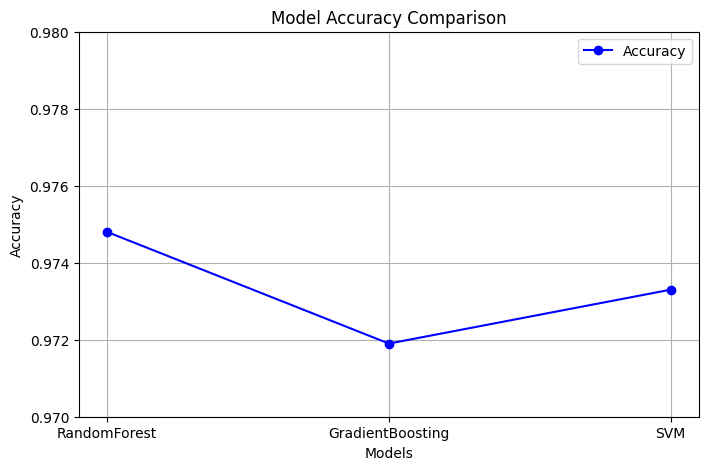

In [21]:
import matplotlib.pyplot as plt

# Model names
models = ["RandomForest", "GradientBoosting", "SVM"]

# Accuracy values
accuracies = [0.9748, 0.9719, 0.9733]

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(models, accuracies, marker='o', linestyle='-', color='b', label='Accuracy')

# Labels and title
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0.97, 0.98)  # Adjusting y-axis for better visualization
plt.grid(True)
plt.legend()

# Show plot
plt.show()


# **Model Performance Visualization**

## **Overview**
This section visualizes the accuracy and confusion matrices of the trained models to better understand their performance.

## **1. Bar Chart for Accuracy Comparison**
- A **bar chart** is used to compare the accuracy of the **RandomForest, GradientBoosting, and SVM** models.
- The accuracy values are retrieved from the `results` dictionary.
- Different colors are used for each bar to enhance readability.

## **2. Confusion Matrix Heatmaps**
- **Confusion matrices** provide insights into model classification errors.
- A **heatmap** is created for each model using `seaborn.heatmap()`:
  - **X-axis**: Predicted class.
  - **Y-axis**: Actual class.
  - **Annotations** display raw classification counts.
  - The color map ("Blues") visually represents classification densities.
- These heatmaps help in identifying how well each model distinguishes between obfuscated and non-obfuscated scripts.

## **Key Takeaways**
- The bar chart provides a **quick comparison** of model accuracy.
- The confusion matrices **highlight classification strengths and weaknesses**.
- Combined, these visualizations aid in selecting the best model for JavaScript obfuscation detection.


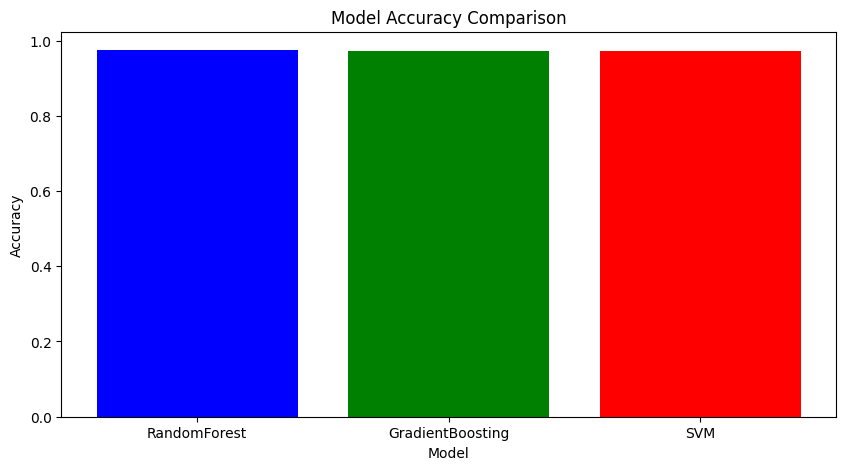

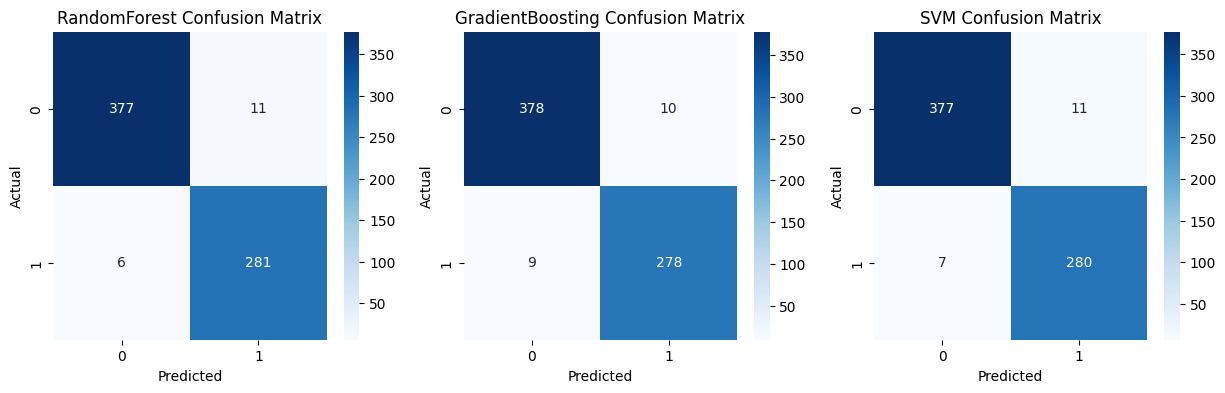

In [16]:

# Visualization of Model Performance
plt.figure(figsize=(10, 5))
accuracies = [results[model]["accuracy"] for model in models]
plt.bar(models.keys(), accuracies, color=['blue', 'green', 'red'])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()

# Plot Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i, (name, result) in enumerate(results.items()):
    sns.heatmap(result["conf_matrix"], annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_title(f"{name} Confusion Matrix")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")
plt.show()